# **Data Collection**

## Objectives

*  Engineering features for Regression model.


## Inputs

* inputs/datasets/cleaned/TrainSetCleaned.csv
* inputs/datasets/cleaned/TestSetCleaned.csv

.

## Outputs


* Generate a list with to the engineer.




---

In [1]:

%pip install -r ../requirements.txt


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

* We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing2/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing2'

---

# Fetch raw data from Kaggle

---

In [5]:
%pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Display first rows of dataset

In [6]:
import pandas as pd
train_set_path = "outputs/datasets/cleaned/TrainSetCleaned.csv"
TrainSet = pd.read_csv(train_set_path)
TrainSet.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,1828,0.0,2.883272,Av,48,Unf,1774,774,Unf,2007.0,...,11694,90.0,452.0,108,5,9,1822,2007,2007,314813
1,894,0.0,2.000000,No,0,Unf,894,308,Unf,1962.0,...,6600,60.0,0.0,0,5,5,894,1962,1962,109500
2,964,0.0,2.000000,No,713,ALQ,163,432,Unf,1921.0,...,13360,80.0,0.0,0,7,5,876,1921,2006,163500


In [7]:
test_set_path = "outputs/datasets/cleaned/TestSetCleaned.csv"
TestSet = pd.read_csv(test_set_path)
TestSet.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,2515,0.0,4.0,No,1219,Rec,816,484,Unf,1975.0,...,32668,69.0,0.0,0,3,6,2035,1957,1975,200624
1,958,620.0,3.0,No,403,BLQ,238,240,Unf,1941.0,...,9490,79.0,0.0,0,7,6,806,1941,1950,133000
2,979,224.0,3.0,No,185,LwQ,524,352,Unf,1950.0,...,7015,69.0,161.0,0,4,5,709,1950,1950,110000


Explore Data

In [8]:
import pandas as pd
import numpy as np

def analyze_dataframe(df):
    analysis = []

    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            skewness = df[col].skew()
            num_zeros = (df[col] == 0).sum()
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            num_outliers = ((df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))).sum()
            analysis.append({
                'Variable': col,
                'Type': 'Numerical',
                'Skewness': round(skewness, 2),
                'Num_Zeros': num_zeros,
                'Num_Outliers': num_outliers
            })
        else:
            unique_values = df[col].nunique()
            most_frequent = df[col].mode().iloc[0]
            analysis.append({
                'Variable': col,
                'Type': 'Categorical',
                'Unique_Values': unique_values,
                'Most_Frequent': most_frequent
            })

    analysis_df = pd.DataFrame(analysis)
    return analysis_df


Analyze the dataframe

In [9]:
# Analyze the TrainSet DataFrame
analysis_df = analyze_dataframe(TrainSet)

# Display the analysis DataFrame using standard pandas functionality
pd.set_option('display.max_rows', None)  # Adjust this as needed
print(analysis_df)


        Variable         Type  Skewness  Num_Zeros  Num_Outliers  \
0       1stFlrSF    Numerical      0.96        0.0          13.0   
1       2ndFlrSF    Numerical      0.87      686.0           2.0   
2   BedroomAbvGr    Numerical      0.27        4.0          25.0   
3   BsmtExposure  Categorical       NaN        NaN           NaN   
4     BsmtFinSF1    Numerical      0.76      381.0           4.0   
5   BsmtFinType1  Categorical       NaN        NaN           NaN   
6      BsmtUnfSF    Numerical      0.88       92.0          21.0   
7     GarageArea    Numerical      0.17       58.0          14.0   
8   GarageFinish  Categorical       NaN        NaN           NaN   
9    GarageYrBlt    Numerical     -0.67        0.0           1.0   
10     GrLivArea    Numerical      1.08        0.0          24.0   
11   KitchenQual  Categorical       NaN        NaN           NaN   
12       LotArea    Numerical     12.14        0.0          57.0   
13   LotFrontage    Numerical      1.92        0

# Summary initial data exploration
Several numerical variables exhibit skewness greater than 1 or less than -1, indicating significant asymmetry in the data distributions.
Variables like LotArea, LotFrontage, MasVnrArea, and OpenPorchSF have a notable number of outliers, which may need attention during data preprocessing.
The presence of many zeros in certain numerical variables (e.g., 2ndFlrSF, BsmtFinSF1, MasVnrArea) could indicate a need for special treatment or transformation.
For categorical variables, understanding the distribution of categories can help in encoding and feature engineering.

Based on the observations, in the following sections, we will apply feature engineering techniques to address these issues and prepare the dataset for machine learning.
Prepare dataframe for correlation and PPS visualization


Heatmap Correlation

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)


ts_corr_pearson, ts_corr_spearman, pps_matrix = CalculateCorrAndPPS(TrainSet)


PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  462.0  0.058  0.106  0.0  0.0  0.0  0.074  0.618


Visualize heatmaps for Spearman correlation, Pearson correlation and Power Predictive Score (PPS)



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



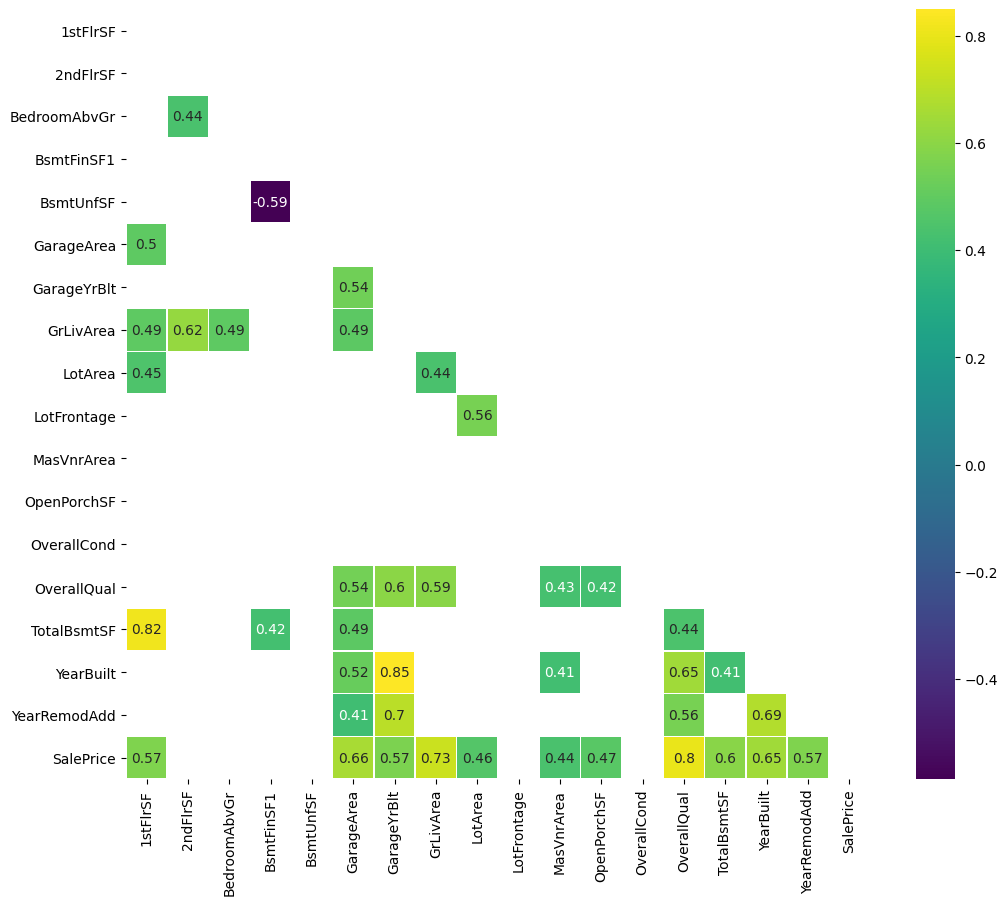



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



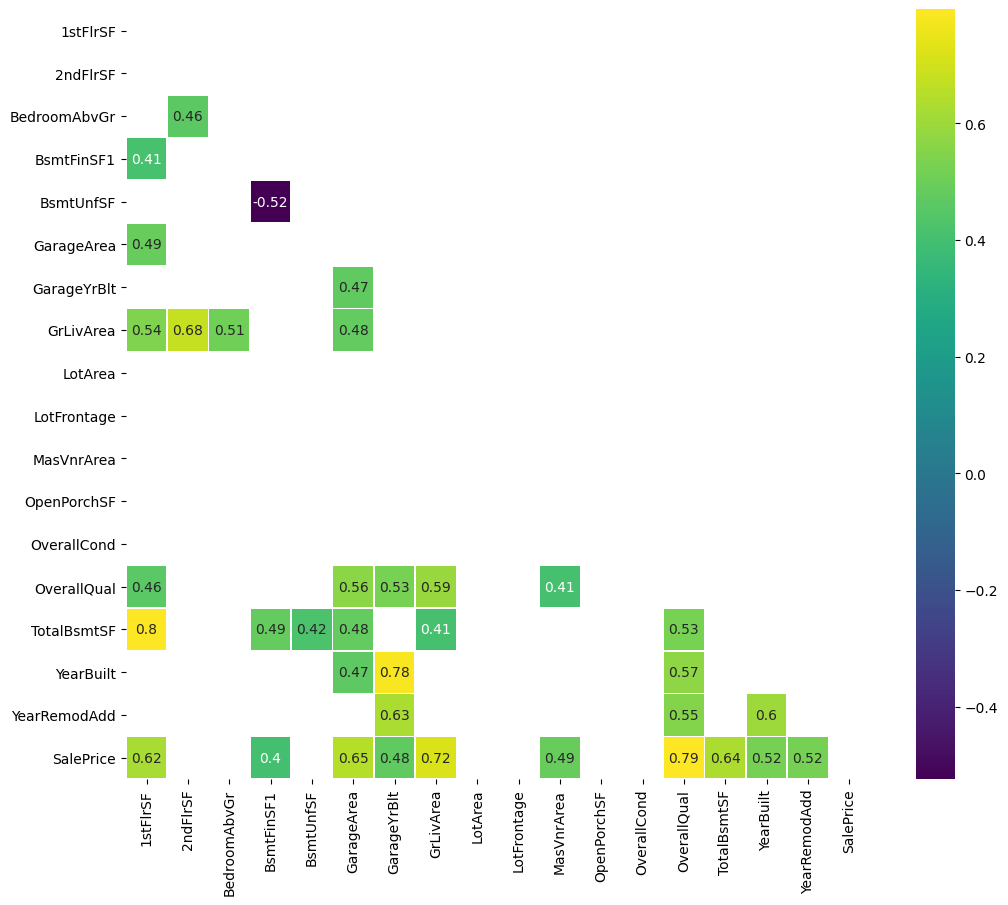



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



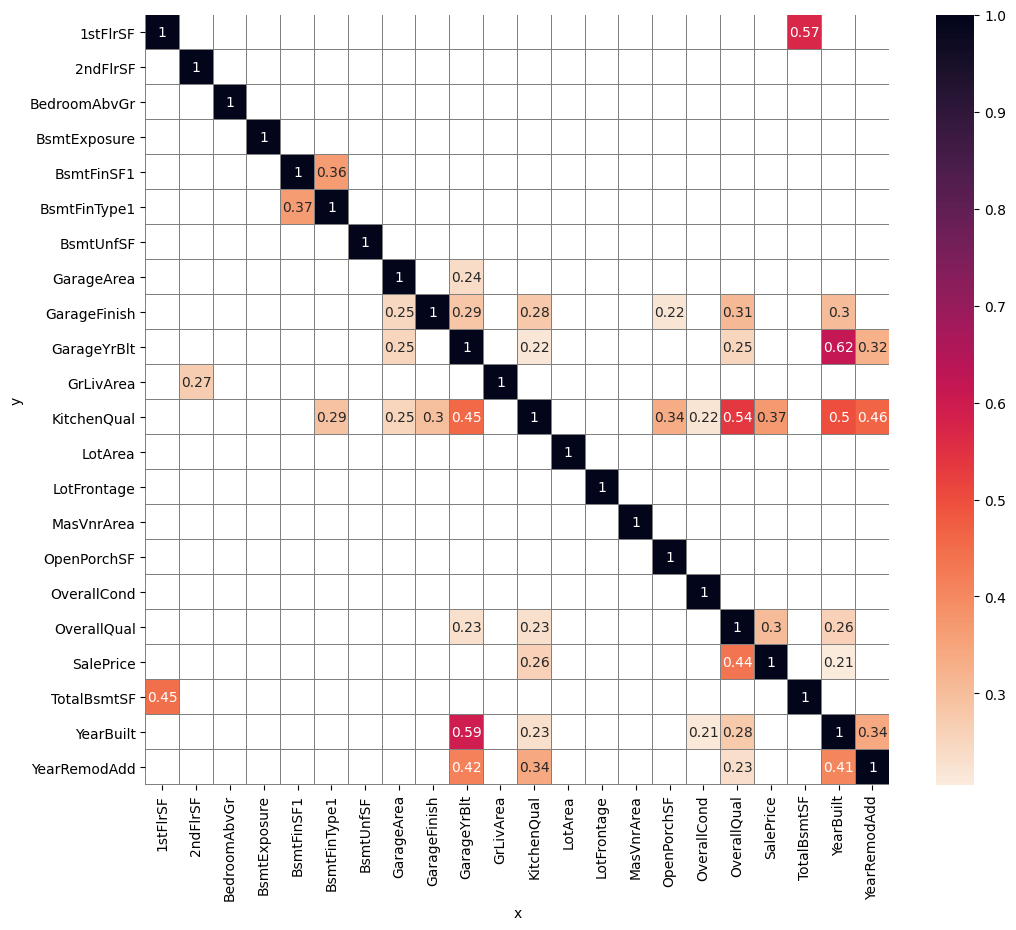

In [12]:
DisplayCorrAndPPS(df_corr_pearson = ts_corr_pearson,
                  df_corr_spearman = ts_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=10)


Check wich variables to be used for transformations in Feature engineering

In [13]:
import pandas as pd
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Load the cleaned datasets
train_set_path = "/workspace/heritage-housing2/outputs/datasets/cleaned/TrainSetCleaned.csv"
df_train = pd.read_csv(train_set_path)

# Add a small constant to numerical variables to handle zero or negative values
small_constant = 1e-6
numerical_cols_train = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_train[numerical_cols_train] += small_constant

# Function to evaluate normality of variables
def evaluate_normality(df, variables):
    normality_results = {}
    for var in variables:
        stat, p_value = stats.shapiro(df[var])
        normality_results[var] = (stat, p_value)
    return normality_results

# Evaluate the normality of the original variables
original_normality_results = evaluate_normality(df_train, numerical_cols_train)

# Determine which variables need transformation (p-value < 0.05 indicates non-normal distribution)
variables_to_transform = [var for var, (stat, p_value) in original_normality_results.items() if p_value < 0.05]

# Print normality results and the variables that need transformation
print("Original normality results:")
for var, (stat, p_value) in original_normality_results.items():
    print(f"{var}: Shapiro-Wilk Statistic={stat}, p-value={p_value}")

print("\nVariables that need transformation:")
for var in variables_to_transform:
    print(var)


Original normality results:
1stFlrSF: Shapiro-Wilk Statistic=0.9498491883277893, p-value=1.6210763819857165e-19
2ndFlrSF: Shapiro-Wilk Statistic=0.7518218755722046, p-value=1.2519540995804747e-38
BedroomAbvGr: Shapiro-Wilk Statistic=0.8430836200714111, p-value=1.8897764401333456e-32
BsmtFinSF1: Shapiro-Wilk Statistic=0.8844210505485535, p-value=1.2148330347544766e-28
BsmtUnfSF: Shapiro-Wilk Statistic=0.9331331253051758, p-value=1.8877491949036747e-22
GarageArea: Shapiro-Wilk Statistic=0.9777519702911377, p-value=2.035145706472119e-12
GarageYrBlt: Shapiro-Wilk Statistic=0.9281317591667175, p-value=3.203832033265942e-23
GrLivArea: Shapiro-Wilk Statistic=0.9459043741226196, p-value=2.877256641651355e-20
LotArea: Shapiro-Wilk Statistic=0.3237818479537964, p-value=0.0
LotFrontage: Shapiro-Wilk Statistic=0.881690502166748, p-value=6.346487454936985e-29
MasVnrArea: Shapiro-Wilk Statistic=0.6320898532867432, p-value=2.2420775429197073e-44
OpenPorchSF: Shapiro-Wilk Statistic=0.723077118396759, 

In [14]:
import pandas as pd
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Load the cleaned datasets
train_set_path = "/workspace/heritage-housing2/outputs/datasets/cleaned/TrainSetCleaned.csv"
test_set_path = "/workspace/heritage-housing2/outputs/datasets/cleaned/TestSetCleaned.csv"
df_train = pd.read_csv(train_set_path)
df_test = pd.read_csv(test_set_path)

# Add a small constant to numerical variables to handle zero or negative values
small_constant = 1e-6
numerical_cols_train = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols_test = df_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_train[numerical_cols_train] += small_constant
df_test[numerical_cols_test] += small_constant

# Function to evaluate normality of variables
def evaluate_normality(df, variables):
    normality_results = {}
    for var in variables:
        stat, p_value = stats.shapiro(df[var])
        normality_results[var] = (stat, p_value)
    return normality_results

# Evaluate the normality of the original variables in the training set
original_normality_results_train = evaluate_normality(df_train, numerical_cols_train)

# Determine which variables need transformation in the training set (p-value < 0.05 indicates non-normal distribution)
variables_to_transform_train = [var for var, (stat, p_value) in original_normality_results_train.items() if p_value < 0.05]

# Evaluate the normality of the original variables in the test set
original_normality_results_test = evaluate_normality(df_test, numerical_cols_test)

# Determine which variables need transformation in the test set (p-value < 0.05 indicates non-normal distribution)
variables_to_transform_test = [var for var, (stat, p_value) in original_normality_results_test.items() if p_value < 0.05]

# Print normality results for the training set
print("Original normality results (Training Set):")
for var, (stat, p_value) in original_normality_results_train.items():
    print(f"{var}: Shapiro-Wilk Statistic={stat}, p-value={p_value}")

print("\nVariables that need transformation (Training Set):")
for var in variables_to_transform_train:
    print(var)

# Print normality results for the test set
print("\nOriginal normality results (Test Set):")
for var, (stat, p_value) in original_normality_results_test.items():
    print(f"{var}: Shapiro-Wilk Statistic={stat}, p-value={p_value}")

print("\nVariables that need transformation (Test Set):")
for var in variables_to_transform_test:
    print(var)



Original normality results (Training Set):
1stFlrSF: Shapiro-Wilk Statistic=0.9498491883277893, p-value=1.6210763819857165e-19
2ndFlrSF: Shapiro-Wilk Statistic=0.7518218755722046, p-value=1.2519540995804747e-38
BedroomAbvGr: Shapiro-Wilk Statistic=0.8430836200714111, p-value=1.8897764401333456e-32
BsmtFinSF1: Shapiro-Wilk Statistic=0.8844210505485535, p-value=1.2148330347544766e-28
BsmtUnfSF: Shapiro-Wilk Statistic=0.9331331253051758, p-value=1.8877491949036747e-22
GarageArea: Shapiro-Wilk Statistic=0.9777519702911377, p-value=2.035145706472119e-12
GarageYrBlt: Shapiro-Wilk Statistic=0.9281317591667175, p-value=3.203832033265942e-23
GrLivArea: Shapiro-Wilk Statistic=0.9459043741226196, p-value=2.877256641651355e-20
LotArea: Shapiro-Wilk Statistic=0.3237818479537964, p-value=0.0
LotFrontage: Shapiro-Wilk Statistic=0.881690502166748, p-value=6.346487454936985e-29
MasVnrArea: Shapiro-Wilk Statistic=0.6320898532867432, p-value=2.2420775429197073e-44
OpenPorchSF: Shapiro-Wilk Statistic=0.72

Check winzoriser

In [15]:
import pandas as pd
from scipy import stats
from feature_engine.outliers import Winsorizer
import warnings

warnings.filterwarnings('ignore')

# Load the cleaned dataset
train_set_path = "/workspace/heritage-housing2/outputs/datasets/cleaned/TrainSetCleaned.csv"
df_train = pd.read_csv(train_set_path)

# Add a small constant to numerical variables to handle zero or negative values
small_constant = 1e-6
numerical_cols_train = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_train[numerical_cols_train] += small_constant

# Function to apply Winsorizer and evaluate normality
def apply_winsorizer_and_evaluate(df, variable):
    try:
        winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=[variable])
        transformed_df = winsorizer.fit_transform(df[[variable]])
        stat, p_value = stats.shapiro(transformed_df[variable])
        return (stat, p_value)
    except Exception as e:
        return (None, str(e))

# Evaluate Winsorizer on all numerical variables
winsorizer_results = {var: apply_winsorizer_and_evaluate(df_train, var) for var in numerical_cols_train}

# Print the results
print("Winsorizer Normality Results:")
for var, (stat, p_value) in winsorizer_results.items():
    if stat is not None:
        print(f"{var}: Shapiro-Wilk Statistic={stat}, p-value={p_value}")
    else:
        print(f"{var}: Error - {p_value}")

# Decision based on p-value threshold
include_winsorizer = {var: (stat, p_value) for var, (stat, p_value) in winsorizer_results.items() if p_value > 0.05}

print("\nVariables to include Winsorizer based on p-value > 0.05:")
for var, (stat, p_value) in include_winsorizer.items():
    print(f"{var}: Shapiro-Wilk Statistic={stat}, p-value={p_value}")


Winsorizer Normality Results:
1stFlrSF: Shapiro-Wilk Statistic=0.9633599519729614, p-value=1.4436715732950008e-16
2ndFlrSF: Shapiro-Wilk Statistic=0.7516961097717285, p-value=1.2315524551085232e-38
BedroomAbvGr: Shapiro-Wilk Statistic=0.8494873046875, p-value=6.457612893325586e-32
BsmtFinSF1: Shapiro-Wilk Statistic=0.8850163221359253, p-value=1.4017955730007841e-28
BsmtUnfSF: Shapiro-Wilk Statistic=0.9338380694389343, p-value=2.4431421082768415e-22
GarageArea: Shapiro-Wilk Statistic=0.9780409932136536, p-value=2.5612602316815725e-12
GarageYrBlt: Shapiro-Wilk Statistic=0.9280200004577637, p-value=3.0826525852600457e-23
GrLivArea: Shapiro-Wilk Statistic=0.9689005017280579, p-value=3.9434838586868e-15
LotArea: Shapiro-Wilk Statistic=0.9789274334907532, p-value=5.250724768174342e-12
LotFrontage: Shapiro-Wilk Statistic=0.9701365828514099, p-value=8.713626134114645e-15
MasVnrArea: Shapiro-Wilk Statistic=0.6923407316207886, p-value=1.018463723871277e-41
OpenPorchSF: Shapiro-Wilk Statistic=0.7

Main Feature Engineering Code

In [16]:
import pandas as pd
import numpy as np
from scipy import stats
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.selection import SmartCorrelatedSelection
import warnings

warnings.filterwarnings('ignore')

# Load the cleaned datasets
train_set_path = "/workspace/heritage-housing2/outputs/datasets/cleaned/TrainSetCleaned.csv"
test_set_path = "/workspace/heritage-housing2/outputs/datasets/cleaned/TestSetCleaned.csv"
df_train = pd.read_csv(train_set_path)
df_test = pd.read_csv(test_set_path)

# Add a small constant to numerical variables to handle zero or negative values
small_constant = 1e-6
numerical_cols_train = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols_test = df_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_train[numerical_cols_train] += small_constant
df_test[numerical_cols_test] += small_constant

# Function to apply transformations and evaluate normality
def apply_and_evaluate_transformation(df, transformer, variable):
    try:
        transformed_df = transformer.fit_transform(df[[variable]])
        stat, p_value = stats.shapiro(transformed_df[variable])
        return (transformer.__class__.__name__, stat, p_value)
    except Exception as e:
        return (transformer.__class__.__name__, None, str(e))

# Manually identified variables that need transformation
variables_to_transform = [
    '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF', 
    'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'LotFrontage', 
    'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 
    'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice'
]

# Define transformers and variables
variables_transformers = {
    '1stFlrSF': [vt.LogTransformer(variables=['1stFlrSF'], base='e')],
    '2ndFlrSF': [vt.LogTransformer(variables=['2ndFlrSF'], base='e')],
    'BedroomAbvGr': [vt.LogTransformer(variables=['BedroomAbvGr'], base='e')],
    'BsmtFinSF1': [vt.LogTransformer(variables=['BsmtFinSF1'], base='e')],
    'BsmtUnfSF': [
        vt.YeoJohnsonTransformer(variables=['BsmtUnfSF']),
        vt.PowerTransformer(variables=['BsmtUnfSF'])
    ],
    'GarageArea': [vt.YeoJohnsonTransformer(variables=['GarageArea'])],
    'GarageYrBlt': [vt.LogTransformer(variables=['GarageYrBlt'], base='e')],
    'GrLivArea': [
        vt.LogTransformer(variables=['GrLivArea'], base='e'),
        Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['GrLivArea'])
    ],
    'LotArea': [vt.PowerTransformer(variables=['LotArea'])],
    'LotFrontage': [vt.LogTransformer(variables=['LotFrontage'], base='e')],
    'MasVnrArea': [vt.LogTransformer(variables=['MasVnrArea'], base='e')],
    'OpenPorchSF': [vt.LogTransformer(variables=['OpenPorchSF'], base='e')],
    'OverallCond': [vt.LogTransformer(variables=['OverallCond'], base='e')],
    'OverallQual': [vt.LogTransformer(variables=['OverallQual'], base='e')],
    'TotalBsmtSF': [vt.YeoJohnsonTransformer(variables=['TotalBsmtSF'])],
    'YearBuilt': [vt.LogTransformer(variables=['YearBuilt'], base='e')],
    'YearRemodAdd': [vt.LogTransformer(variables=['YearRemodAdd'], base='e')],
    'SalePrice': [vt.LogTransformer(variables=['SalePrice'], base='e')]
}

# Apply transformations and evaluate
all_results = {var: [] for var in variables_to_transform}

for var in variables_to_transform:
    transformers = variables_transformers.get(var, [])
    for transformer in transformers:
        result = apply_and_evaluate_transformation(df_train, transformer, var)
        all_results[var].append(result)

# Select the best transformation for each variable
best_transformations = {}
for var, results in all_results.items():
    results = [res for res in results if res[1] is not None]  # Filter out failed transformations
    if results:
        best_transformation = max(results, key=lambda x: x[1])  # Select based on Shapiro-Wilk statistic
        best_transformations[var] = best_transformation[0]

# Track and apply the best transformations
applied_transformations_train = {}
applied_transformations_test = {}

def apply_best_transformations(df, best_transformations, applied_transformations):
    df_transformed = df.copy()  # Initialize df_transformed
    for var, transformer_name in best_transformations.items():
        transformer = next(
            t for t in variables_transformers[var] if t.__class__.__name__ == transformer_name)
        df_transformed = fit_transform_step(df_transformed, transformer, transformer_name, applied_transformations)
    return df_transformed

# Function to apply transformations step-by-step with debug statements
def fit_transform_step(df, transformer, name, applied_transformations):
    try:
        df_transformed = transformer.fit_transform(df)
        print(f"{name} transformation applied successfully.")
        for var in transformer.variables:
            if var not in applied_transformations:
                applied_transformations[var] = []
            applied_transformations[var].append(name)
        return df_transformed
    except Exception as e:
        print(f"Error during {name} transformation: {e}")
        return df

df_train_transformed = apply_best_transformations(df_train, best_transformations, applied_transformations_train)
df_test_transformed = apply_best_transformations(df_test, best_transformations, applied_transformations_test)

# Implement SmartCorrelatedSelection
correlation_selector = SmartCorrelatedSelection(
    variables=None,  # all numerical variables
    method='pearson',
    threshold=0.8,
    selection_method='variance'
)

# Apply the correlation selector to the transformed data
df_train_selected = correlation_selector.fit_transform(df_train_transformed)
df_test_selected = correlation_selector.transform(df_test_transformed)

# Save the transformed datasets
df_train_selected.to_csv("/workspace/heritage-housing2/outputs/datasets/cleaned/TrainSetTransformed_Selected.csv", index=False)
df_test_selected.to_csv("/workspace/heritage-housing2/outputs/datasets/cleaned/TestSetTransformed_Selected.csv", index=False)

# Generate Summary Table
summary_table = []

categorical_variables = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']
for var in categorical_variables:
    summary_table.append([var, 'OrdinalEncoder, SmartCorrelatedSelection'])

for var, transformer_name in best_transformations.items():
    transformations = f'Numerical - {transformer_name}, SmartCorrelatedSelection'
    summary_table.append([var, transformations])

summary_df = pd.DataFrame(summary_table, columns=['Variable', 'Proposed Transformation'])
summary_df.loc[summary_df['Variable'] == 'SalePrice', 'Proposed Transformation'] = 'None - target variable'
print(summary_df.to_string(index=False))


LogTransformer transformation applied successfully.
LogTransformer transformation applied successfully.
LogTransformer transformation applied successfully.
LogTransformer transformation applied successfully.
PowerTransformer transformation applied successfully.
YeoJohnsonTransformer transformation applied successfully.
LogTransformer transformation applied successfully.
LogTransformer transformation applied successfully.
PowerTransformer transformation applied successfully.
LogTransformer transformation applied successfully.
LogTransformer transformation applied successfully.
LogTransformer transformation applied successfully.
LogTransformer transformation applied successfully.
LogTransformer transformation applied successfully.
YeoJohnsonTransformer transformation applied successfully.
LogTransformer transformation applied successfully.
LogTransformer transformation applied successfully.
LogTransformer transformation applied successfully.
LogTransformer transformation applied successf

### Conclusion and Next Steps

In this section, we reviewed the house attributes and the proposed transformations as summarized in the table below:

| Feature        | Transformer(s)                                     |
|----------------|----------------------------------------------------|
| BsmtExposure   | OrdinalEncoder, SmartCorrelatedSelection           |
| BsmtFinType1   | OrdinalEncoder, SmartCorrelatedSelection           |
| GarageFinish   | OrdinalEncoder, SmartCorrelatedSelection           |
| KitchenQual    | OrdinalEncoder, SmartCorrelatedSelection           |
| 1stFlrSF       | Numerical - LogTransformer, SmartCorrelatedSelection |
| 2ndFlrSF       | Numerical - LogTransformer, SmartCorrelatedSelection |
| BedroomAbvGr   | Numerical - LogTransformer, SmartCorrelatedSelection |
| BsmtFinSF1     | Numerical - LogTransformer, SmartCorrelatedSelection |
| BsmtUnfSF      | Numerical - PowerTransformer, SmartCorrelatedSelection |
| GarageArea     | Numerical - YeoJohnsonTransformer, SmartCorrelatedSelection |
| GarageYrBlt    | Numerical - LogTransformer, SmartCorrelatedSelection |
| GrLivArea      | Numerical - LogTransformer, SmartCorrelatedSelection |
| LotArea        | Numerical - PowerTransformer, SmartCorrelatedSelection |
| LotFrontage    | Numerical - LogTransformer, SmartCorrelatedSelection |
| MasVnrArea     | Numerical - LogTransformer, SmartCorrelatedSelection |
| OpenPorchSF    | Numerical - LogTransformer, SmartCorrelatedSelection |
| OverallCond    | Numerical - LogTransformer, SmartCorrelatedSelection |
| OverallQual    | Numerical - LogTransformer, SmartCorrelatedSelection |
| TotalBsmtSF    | Numerical - YeoJohnsonTransformer, SmartCorrelatedSelection |
| YearBuilt      | Numerical - LogTransformer, SmartCorrelatedSelection |
| YearRemodAdd   | Numerical - LogTransformer, SmartCorrelatedSelection |

Moving forward, we will create the pipeline model in the next notebook. This model will incorporate the transformations listed and further refine our data processing and analysis approach.

